## <center>DataLab Cup 1: Text Feature Engineering</center>

#### 1. To import the dataset 

In [64]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import pandas as pd

df = pd.read_csv('../dataset/train.csv')
print(df.head(5))
print(df.loc[0, :])

   Id  Popularity                                       Page content
0   0          -1  <html><head><div class="article-info"> <span c...
1   1           1  <html><head><div class="article-info"><span cl...
2   2           1  <html><head><div class="article-info"><span cl...
3   3          -1  <html><head><div class="article-info"><span cl...
4   4          -1  <html><head><div class="article-info"><span cl...
Id                                                              0
Popularity                                                     -1
Page content    <html><head><div class="article-info"> <span c...
Name: 0, dtype: object


#### 2. Preprocessing: Data Cleaning

In [65]:
print(df.loc[0,'Page content'])

<html><head><div class="article-info"> <span class="byline basic">Clara Moskowitz</span> for <a href="/publishers/space-com/">Space.com</a> <time datetime="Wed, 19 Jun 2013 15:04:30 +0000">2013-06-19 15:04:30 UTC</time> </div></head><body><h1 class="title">NASA's Grand Challenge: Stop Asteroids From Destroying Earth</h1><figure class="article-image"><img class="microcontent" data-fragment="lead-image" data-image="http://i.amz.mshcdn.com/I7b9cUsPSztew7r1WT6_iBLjflo=/950x534/2013%2F06%2F19%2Ffe%2FDactyl.44419.jpg" data-micro="1" data-url="http://mashable.com/2013/06/19/nasa-grand-challenge-asteroid/" src="http://i.amz.mshcdn.com/I7b9cUsPSztew7r1WT6_iBLjflo=/950x534/2013%2F06%2F19%2Ffe%2FDactyl.44419.jpg"/></figure><article data-channel="world"><section class="article-content"> <p>There may be killer asteroids headed for Earth, and NASA has decided to do something about it. The space agency announced a new "Grand Challenge" on June 18 to find all dangerous space rocks and figure out how t

* To removing all HTML tags
* To removing punctuation marks but emoticons
* To converting all characters to lowercase

In [66]:
import re
from bs4 import BeautifulSoup

def preprocessor(text):
    # remove HTML tags
    
    text = BeautifulSoup(text, 'html.parser').get_text()


    # regex for matching emoticons, keep emoticons, ex: :), :-P, :-D
    r = '(?::|;|=|X)(?:-)?(?:\)|\(|D|P)'
    emoticons = re.findall(r, text)
    text = re.sub(r, '', text)

    # convert to lowercase and append all emoticons behind (with space in between)
    # replace('-','') removes nose of emoticons
    text = re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-','')
    return text

In [67]:
print(preprocessor(df.loc[0,'Page content']))

 clara moskowitz for space com 2013 06 19 15 04 30 utc nasa s grand challenge stop asteroids from destroying earth there may be killer asteroids headed for earth and nasa has decided to do something about it the space agency announced a new grand challenge on june 18 to find all dangerous space rocks and figure out how to stop them from destroying our planet the new mission builds on projects already underway at nasa including a plan to capture an asteroid pull it in toward the moon and send astronauts to visit it as part of the grand challenge the agency issued a request for information today aiming to solicit ideas from industry academia and the public on how to improve the asteroid mission plan we re asking for you to think about concepts and different approaches for what we ve described here william gerstenmaier nasa s associate administrator for human explorations and operations said yesterday during a nasa event announcing the initiative we want you to think about other ways of e

* To split the text corpora into individual elements

In [68]:
def tokenizer(text):
    return re.split('\s+', text.strip())

print(tokenizer('runners like running and thus they run'))

['runners', 'like', 'running', 'and', 'thus', 'they', 'run']


#### 3. Preprocessing: Word Stemming

* To reduce the word to its root.

In [69]:
from nltk.stem.porter import PorterStemmer

def tokenizer_stem(text):
    porter = PorterStemmer()
    return [porter.stem(word) for word in re.split('\s+', text.strip())]

print(tokenizer_stem('runners like running and thus they run'))

['runner', 'like', 'run', 'and', 'thu', 'they', 'run']


#### 4. Preprocessing: Stop-Word Removal

* Stop words contain little useful information, so we can remove it.

In [70]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
stop = stopwords.words('english')

def tokenizer_stem_nostop(text):
    porter = PorterStemmer()
    return [porter.stem(w) for w in re.split('\s+', text.strip()) \
            if w not in stop and re.match('[a-zA-Z]+', w)]

print(tokenizer_stem_nostop('runners like running and thus they run'))

['runner', 'like', 'run', 'thu', 'run']


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mfhsieh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### - BoW (Bag-Of-Words)

1. 透過整個文件集中的唯一標記來建構詞彙詞典。
2. 用向量來表示每個文檔，其中每個位置對應詞彙字典中的一個詞彙的出現次數。

In [71]:
import numpy as np
import scipy as sp
from sklearn.feature_extraction.text import CountVectorizer

doc_dummy = ["Study hard, then you will be happy and I will be happy",
           "\"I'm not happy :(\" \", because you don't study hard"]
print('[example documents]\n{}\n'.format('\n'.join(doc_dummy)))

# ngram_range=(min,max), default: 1-gram => (1,1) (consider single word)
count = CountVectorizer(ngram_range=(1, 1),
                        preprocessor=preprocessor,  # remove tags
                        tokenizer=tokenizer_stem_nostop)    # remove stop words

count.fit(doc_dummy)
# dictionary is stored in vocabulary_
BoW = count.vocabulary_
print('[vocabulary]\n{}'.format(BoW))

[example documents]
Study hard, then you will be happy and I will be happy
"I'm not happy :(" ", because you don't study hard

[vocabulary]
{'studi': 2, 'hard': 1, 'happi': 0}


In [72]:
# get matrix (doc_id, vocabulary_id) --> tf

doc_bag = count.transform(doc_dummy) # CountVectorizer.transform(): 每個條目對應到一對（文檔索引，詞彙索引）。每個條目中的值代表詞頻，即特定詞彙（術語）在特定文檔中出現的次數。
print('(did, vid)\ttf')
print(doc_bag)

print('\nIs document-term matrix a scipy.sparse matrix? {}'.format(sp.sparse.issparse(doc_bag)))

(did, vid)	tf
  (0, 0)	2
  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1

Is document-term matrix a scipy.sparse matrix? True


In [73]:
# to converte the sparse matrix to a dense matrix

doc_bag = doc_bag.toarray()
print(doc_bag)

print('\nAfter calling .toarray(), is it a scipy.sparse matrix? {}'.format(sp.sparse.issparse(doc_bag)))

[[2 1 1]
 [1 1 1]]

After calling .toarray(), is it a scipy.sparse matrix? False


In [74]:
doc = df['Page content'].iloc[:100]
doc_bag = count.fit_transform(doc).toarray()

print("[most frequent vocabularies]")
bag_cnts = np.sum(doc_bag, axis=0)
top = 10
# [::-1] reverses a list since sort is in ascending order
for tok, v in zip(count.inverse_transform(np.ones((1, bag_cnts.shape[0])))[0][bag_cnts.argsort()[::-1][:top]], np.sort(bag_cnts)[::-1][:top]):
    print('{}: {}'.format(tok, v))

[most frequent vocabularies]
imag: 639
getti: 180
new: 168
also: 165
one: 162
said: 151
see: 147
time: 144
year: 142
world: 135


#### - TF-IDF (Term-Frequency & Inverse-Document-Frequency)

* Calculates not only the term-frequency (TF), but also the document-frequency (DF) of a term

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,1),
                        preprocessor=preprocessor,
                        tokenizer=tokenizer_stem_nostop)

tfidf.fit(doc)

top = 10
# get idf score of vocabularies
idf = tfidf.idf_
print('[vocabularies with smallest idf scores]')
sorted_idx = idf.argsort() # 升序排列

for i in range(top):
    print('%s: %.2f' %(tfidf.get_feature_names_out()[sorted_idx[i]], idf[sorted_idx[i]]))

doc_tfidf = tfidf.transform(doc).toarray()
tfidf_sum = np.sum(doc_tfidf, axis=0)
print("\n[vocabularies with highest tf-idf scores]")
for tok, v in zip(tfidf.inverse_transform(np.ones((1, tfidf_sum.shape[0])))[0][tfidf_sum.argsort()[::-1]][:top], \
                        np.sort(tfidf_sum)[::-1][:top]):
    print('{}: {}'.format(tok, v))

[vocabularies with smallest idf scores]
topic: 1.00
see: 1.12
also: 1.13
imag: 1.21
one: 1.32
new: 1.52
world: 1.54
year: 1.54
like: 1.55
time: 1.61

[vocabularies with highest tf-idf scores]
imag: 4.1122911268509705
app: 2.3867465879041356
video: 2.3321333885238404
game: 2.1911895842442406
said: 2.0142987671015766
new: 2.0010914875633707
compani: 1.9319822679769407
getti: 1.7677938352965423
time: 1.7601195175854225
twitter: 1.7333793682275045


所以，`tfidf.fit(doc)` 主要用於擬合（學習）TF-IDF 轉換器，而 `doc_tfidf = tfidf.transform(doc).toarray()` 用於將實際文件轉換為 TF-IDF 特徵矩陣表示的步驟。前者是初始化和學習的步驟，後者是將文件映射到 TF-IDF 特徵表示的步驟。

In [76]:
print(doc_tfidf.shape)
# feature太多了

(100, 7127)


###  - Feature Hashing

Feature hashing reduces the dimension vocabulary space by hashing each vocabulary into a hash table with a fixed number of buckets. As compared to BoW, feature hashing has the following pros and cons:

In [77]:
import numpy as np
import scipy as sp
from sklearn.feature_extraction.text import HashingVectorizer

print('[example documents]\n{}\n'.format('\n'.join(doc_dummy)))

# hash words to 1024 buckets
hashvec = HashingVectorizer(n_features=2**10,
                            preprocessor=preprocessor,
                            tokenizer=tokenizer_stem_nostop)

# no .fit needed for HashingVectorizer, since it's defined by the hash function

# transform sentences to vectors of dimension 1024
doc_hash = hashvec.transform(doc_dummy)
print(doc_hash.shape)

[example documents]
Study hard, then you will be happy and I will be happy
"I'm not happy :(" ", because you don't study hard

(2, 1024)


### 5. Sentiment Classification Pipeline

Let's use the LogisticRegression model to classify the movie reviews into positive and negative classes. As discussed in previous sections, there are several preprocessing steps to do before, so the workflow will be:

1. Preprocessing: clean the text, and remove stop words;
2. Convert words to vector: extract feature vectors from the raw review text;
3. Classification: train a LogisticRegression model to do sentiment classification;
4. Evaluate: we'll do 10-fold cross-validation to evaluate general performance.

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score

# randomly sample 1000 examples
df_small = df.sample(n=1000, random_state=0)

names = ['LogisticRegression',
         'LogisticRegression+(1,2)gram',
         'LogisticRegression+preprocess',
         'LogisticRegression+preprocess+hash']
# without preprocessing (vect: 特徵提取步驟, clf: 分類器)
pipe1 = Pipeline([('vect', CountVectorizer()),
                  ('clf', LogisticRegression(solver = "liblinear"))])
# without preprocessing, use larger ngram range
pipe2 = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                  ('clf', LogisticRegression(solver = "liblinear"))])
# with preprocessing
pipe3 = Pipeline([('vect', TfidfVectorizer(preprocessor=preprocessor,
                                           tokenizer=tokenizer_stem_nostop)),
                  ('clf', LogisticRegression(solver = "liblinear"))])
# with preprocessing and hasing
pipe4 = Pipeline([('vect', HashingVectorizer(n_features=2**10,
                                             preprocessor=preprocessor,
                                             tokenizer=tokenizer_stem_nostop)),
                  ('clf', LogisticRegression(solver = "liblinear"))])
# CV
print('[auc (10-fold cv)]')
for name, clf in zip(names, [pipe1, pipe2, pipe3, pipe4]):
    scores = cross_val_score(estimator=clf, X=df_small['Page content'], y=df_small['Popularity'], \
                         cv=10, scoring='roc_auc')
    print('%s: %.3f (+/-%.3f)' % (name, scores.mean(), scores.std()))

[auc (10-fold cv)]
LogisticRegression: 0.488 (+/-0.053)
LogisticRegression+(1,2)gram: 0.487 (+/-0.048)
LogisticRegression+preprocess: 0.515 (+/-0.048)
LogisticRegression+preprocess+hash: 0.509 (+/-0.067)


### 6. Use Out-of-Core Learning If You Don't Have Enough Memory

The idea of Out of Core Learning is similar to the stochastic gradient descent, which updates the model when seeing a minibatch, except that each minibatch is loaded from disk via a data stream. Since we only see a part of the dataset at a time, we can only use the `HashingVectorizer` to transform text into feature vectors because the `HashingVectorizer` does not require knowing the vocabulary space in advance.

這段程式碼定義了一個函數 `get_stream`，用於從指定的 CSV 檔案中以特定大小的資料塊（chunk）讀取資料。這個函數返回一個產生器（generator），並使用 `next` 函數來取得產生器的下一個資料塊。以下是程式碼的解釋：

1. `def get_stream(path, size)`：這是函數的定義部分。它接受兩個參數：
   - `path`：指定的 CSV 檔案的路徑。
   - `size`：指定每個資料塊（chunk）的大小。

2. `for chunk in pd.read_csv(path, chunksize=size):`：這是一個迴圈，使用 Pandas 庫的 `read_csv` 函數來讀取指定路徑的 CSV 檔案，並按照指定的大小（`chunksize=size`）進行分塊讀取資料。每次迭代都會產生一個資料塊，這個資料塊將成為產生器的一個元素。

3. `yield chunk`：使用 `yield` 關鍵字將資料塊產生為產生器的一個元素。這使得函數成為一個產生器函數，可以逐步生成資料塊而不需一次性將整個檔案加載到記憶體中。

4. `print(next(get_stream(path='./dataset/sentiment/train.csv', size=10))`：在這裡，`next(get_stream(...))` 調用了產生器函數，取得產生器的下一個資料塊，並透過 `print` 函數將其列印出來。這將顯示檔案的前10行資料。

這種方法非常有用，特別是當處理大型資料集時，因為它允許逐塊讀取資料而不會佔用太多記憶體。在這個示例中，資料集從 CSV 檔案中以大小為10的資料塊進行讀取。如果您需要處理大型資料集，逐塊讀取資料的方式是一種有效的方法。

In [79]:
def get_stream(path, size):
    for chunk in pd.read_csv(path, chunksize=size):
        yield chunk

print(next(get_stream(path='../dataset/train.csv', size=10)))

   Id  Popularity                                       Page content
0   0          -1  <html><head><div class="article-info"> <span c...
1   1           1  <html><head><div class="article-info"><span cl...
2   2           1  <html><head><div class="article-info"><span cl...
3   3          -1  <html><head><div class="article-info"><span cl...
4   4          -1  <html><head><div class="article-info"><span cl...
5   5          -1  <html><head><div class="article-info"> <span c...
6   6           1  <html><head><div class="article-info"><span cl...
7   7          -1  <html><head><div class="article-info"><span cl...
8   8           1  <html><head><div class="article-info"><span cl...
9   9          -1  <html><head><div class="article-info"><span cl...


For out-of core learning, we have to use models that can <font color='red'>train and update the model's weight iteratively</font>. Here, we use the SGDClassifier to train a LogisticRegressor using the stochastic gradient descent. We can partial update SGDClassifier by calling the partial_fit() method. Our workflow now becomes:

1. Stream documents directly from disk to get a mini-batch (chunk) of documents;
2. Preprocess: clean and remove stop-words in the mini-batch of documents;
3. Convert words to vector: use HashingVectorizer to extract features from text;
4. Update SGDClassifier and go back to step 1.

In [80]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

# n_features: 要生成特徵的數量
hashvec = HashingVectorizer(n_features=2**20,
                            preprocessor=preprocessor, tokenizer=tokenizer_stem_nostop)
# loss='log' gives logistic regression
clf = SGDClassifier(loss='log', max_iter=100, tol=1e-3) # 連續兩次迭代之間的損失函數減小小於 1e-3，則訓練會提前停止。
batch_size = 1000
stream = get_stream(path='../dataset/train.csv', size=batch_size)
# classes: 所有y label的值
classes = np.array([-1, 1])
train_auc, val_auc = [], []
# we use one batch for training and another for validation in each iteration
iters = int((25000+batch_size-1)/(batch_size*2))
for i in range(iters):
    batch = next(stream)
    X_train, y_train = batch['Page content'], batch['Popularity']
    if X_train is None:
        break
    X_train = hashvec.transform(X_train)
    clf.partial_fit(X_train, y_train, classes=classes)
    train_auc.append(roc_auc_score(y_train, clf.predict_proba(X_train)[:,1]))

    # validate
    batch = next(stream)
    X_val, y_val = batch['Page content'], batch['Popularity']
    score = roc_auc_score(y_val, clf.predict_proba(hashvec.transform(X_val))[:,1])
    val_auc.append(score)
    print('[{}/{}] {}'.format((i+1)*(batch_size*2), 25000, score))

[2000/25000] 0.5124337480584779
[4000/25000] 0.5441995261974337
[6000/25000] 0.512878051512206
[8000/25000] 0.5422923603995902
[10000/25000] 0.522976106462345
[12000/25000] 0.4897736318507466
[14000/25000] 0.5275949407608065
[16000/25000] 0.5321031557136058
[18000/25000] 0.5173654036191093
[20000/25000] 0.5044581106966428
[22000/25000] 0.5547955622438525
[24000/25000] 0.5651330421286741


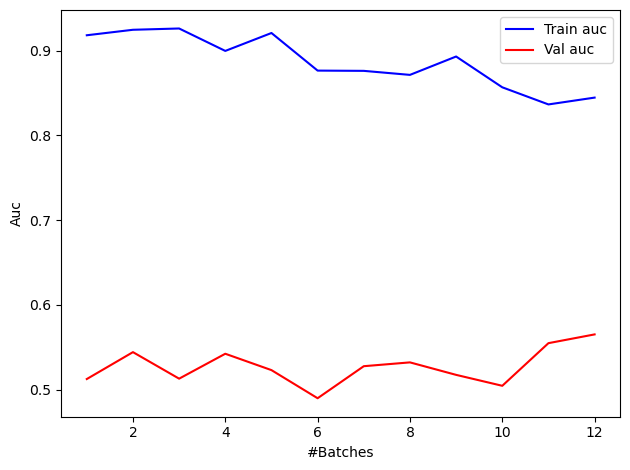

In [81]:
import os
if not os.path.exists('../output'):
    os.mkdir('../output')

import matplotlib.pyplot as plt

plt.plot(range(1, len(train_auc)+1), train_auc, color='blue', label='Train auc')
plt.plot(range(1, len(train_auc)+1), val_auc, color='red', label='Val auc')
plt.legend(loc="best")
plt.xlabel('#Batches')
plt.ylabel('Auc')
plt.tight_layout()
plt.savefig('../output/fig-out-of-core.png', dpi=300)
plt.show()

In [86]:
# import optimized pickle written in C for serializing and
# de-serializing a Python object
import _pickle as pkl

# dump to disk
pkl.dump(hashvec, open('../output/hashvec.pkl', 'wb'))
pkl.dump(clf, open('../output/clf-sgd.pkl', 'wb'))

# load from disk
hashvec = pkl.load(open('../output/hashvec.pkl', 'rb'))
clf = pkl.load(open('../output/clf-sgd.pkl', 'rb'))

df_test = pd.read_csv('../dataset/test.csv')
y_score = clf.predict_proba(hashvec.transform(df_test['Page content']))[:, 1]
df_pred = pd.DataFrame({'Id': df_test['Id'], 'Popularity': y_score})
df_pred.to_csv('../output/test_pred.csv', index=False)

'''
print('test auc: %.3f' % roc_auc_score(df_test['Popularity'], \
            clf.predict_proba(hashvec.transform(df_test['Page content']))[:,1]))
'''

"\nprint('test auc: %.3f' % roc_auc_score(df_test['Popularity'],             clf.predict_proba(hashvec.transform(df_test['Page content']))[:,1]))\n"

In [84]:
df_test

,Id,Page content
0,27643,"<html><head><div class=""article-info""><span cl..."
1,27644,"<html><head><div class=""article-info""><span cl..."
2,27645,"<html><head><div class=""article-info""><span cl..."
3,27646,"<html><head><div class=""article-info""><span cl..."
4,27647,"<html><head><div class=""article-info""><span cl..."
...,...,...
11842,39485,"<html><head><div class=""article-info""><span cl..."
11843,39486,"<html><head><div class=""article-info""><span cl..."
11844,39487,"<html><head><div class=""article-info""><span cl..."
11845,39488,"<html><head><div class=""article-info""><span cl..."
